# <font color='red'> Project 1

### Dataset
For two projects in this class, you will pick your datasets. To receive full credit for this part, your datasets should satisfy the following conditions: 

- At least 15 features (columns)
- At least 1000 instances (rows)
- At least two categorical/ordinal columns.
- Between 5 to 10 percent missing values across the dataset. 

Remember that you should have two separate datasets one for classification and one for regression tasks. 

### Project Description:
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

### Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels (rbf, poly, linear). 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict the target values for the test_set.

### Classification task:
- Decide about a good evaluation strategy and justify your choice.
- Use GridSearchCv and corss-validation to find the best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kerenilzed Support Vector Machine (rbf, poly, and linear), Decision Tree. 
- Which model gives the best results?

### Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged. 

### Questions regarding the project:
- Post your queries related to project on discussion board on e-learning. There is a high possibility that your classmate has also faced the same problem and knows the solution. This is an effort to encourage collaborative learning and also making all the information available to everyone. We will also answer queries there. We will not be answering any project related queries through the mail.

## Classification Task:
#### Datset: Telco Customer Churn
#### Classification problem: Given the information about the customers, what is their probability of churning.
#### Source: Kaggle
#### Dataset with data dictionary attached in zip file

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, recall_score, roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')

C:\Users\shubh\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
KNN = []
LOGISTIC = []
LINEARSVM = []
KERNELSVMLIN = []
KERNELSVM = []
DECISIONTREE = []

### Importing the data

In [3]:
data = pd.read_csv("Telco-Customer-Churn.csv")

### Exploring the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          3295 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         4655 non-null object
StreamingTV         4653 non-null object
StreamingMovies     6962 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
data.shape

(7043, 21)

In [6]:
data.size

147903

### Taking a look at missing values:

In [7]:
data.isnull().sum().sum()

8607

In [8]:
data.isnull().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents          3748
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport         2388
StreamingTV         2390
StreamingMovies       81
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

### Taking a closer look at the percentage of missing values

In [9]:
print("percentage of missing values = {}%".format(data.isnull().sum().sum()/data.size*100))

percentage of missing values = 5.819354576986268%


In [10]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,NaN,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,NaN,2,Yes,No,DSL,Yes,...,No,NaN,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Creating a copy of the original dataset

In [11]:
data1 = data.copy()

In [12]:
data1.describe(include = 'O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,3295,7043,7043,7043,7043,7043,7043,4655,4653,6962,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3018-TFTSU,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,2326,6361,3390,3096,3498,3088,3095,2141,1910,2756,3875,4171,2365,11,5174


### Checking unique values of all variables

In [13]:
for col in data1.describe(include = 'O').columns:
    print("Unique Values in Column - {} => {}".format(col, data1[col].unique()))

Unique Values in Column - customerID => ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique Values in Column - gender => ['Female' 'Male']
Unique Values in Column - Partner => ['Yes' 'No']
Unique Values in Column - Dependents => ['No' nan 'Yes']
Unique Values in Column - PhoneService => ['No' 'Yes']
Unique Values in Column - MultipleLines => ['No phone service' 'No' 'Yes']
Unique Values in Column - InternetService => ['DSL' 'Fiber optic' 'No']
Unique Values in Column - OnlineSecurity => ['No' 'Yes' 'No internet service']
Unique Values in Column - OnlineBackup => ['Yes' 'No' 'No internet service']
Unique Values in Column - DeviceProtection => ['No' 'Yes' 'No internet service']
Unique Values in Column - TechSupport => ['No' nan 'Yes' 'No internet service']
Unique Values in Column - StreamingTV => ['No' nan 'Yes' 'No internet service']
Unique Values in Column - StreamingMovies => ['No' 'Yes' 'No internet service' nan]
Unique Values in Column - Contr

### There are a few columns where people have responsed in 3 ways: Yes, No and No internet Service. As 'No internet service' essentially translates to no use of that service, we will be replacing these values with No

In [14]:
data1 = data1.replace({'No internet service' : 'No' })

In [15]:
for col in data1.describe(include = 'O').columns:
    print("Unique Values in Column - {} => {}".format(col, data1[col].unique()))

Unique Values in Column - customerID => ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique Values in Column - gender => ['Female' 'Male']
Unique Values in Column - Partner => ['Yes' 'No']
Unique Values in Column - Dependents => ['No' nan 'Yes']
Unique Values in Column - PhoneService => ['No' 'Yes']
Unique Values in Column - MultipleLines => ['No phone service' 'No' 'Yes']
Unique Values in Column - InternetService => ['DSL' 'Fiber optic' 'No']
Unique Values in Column - OnlineSecurity => ['No' 'Yes']
Unique Values in Column - OnlineBackup => ['Yes' 'No']
Unique Values in Column - DeviceProtection => ['No' 'Yes']
Unique Values in Column - TechSupport => ['No' nan 'Yes']
Unique Values in Column - StreamingTV => ['No' nan 'Yes']
Unique Values in Column - StreamingMovies => ['No' 'Yes' nan]
Unique Values in Column - Contract => ['Month-to-month' 'One year' 'Two year']
Unique Values in Column - PaperlessBilling => ['Yes' 'No']
Unique Values in Column -

### Imputing missing values

In [16]:
data1.isnull().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents          3748
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport         2388
StreamingTV         2390
StreamingMovies       81
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

### The variable 'Dependents' does not hold any information for more than 50% of the customers. So we are dropping this variable.

In [17]:
data1 = data1.drop('Dependents', axis = 1)

### For missing values in columns - 'StreamingTV', 'TechSupport', 'StreamingMovies', it makes sense to impute the placeholder 'No' if the corresponding value in the column 'InternetService' is 'No'

In [18]:
data1.loc[(data1['StreamingTV'].isnull()) & (data1['InternetService'] == 'No'), 'StreamingTV'] = 'No'
data1.loc[(data1['TechSupport'].isnull()) & (data1['InternetService'] == 'No'), 'TechSupport'] = 'No'
data1.loc[(data1['StreamingMovies'].isnull()) & (data1['InternetService'] == 'No'), 'StreamingMovies'] = 'No'

### Rechecking missing values

In [19]:
data1.isnull().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport         1953
StreamingTV         1747
StreamingMovies       63
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

In [20]:
data1.groupby('TechSupport')['MonthlyCharges'].mean()

TechSupport
No     52.428020
Yes    80.637316
Name: MonthlyCharges, dtype: float64

In [21]:
data1.loc[(data1['StreamingTV'].isnull()) & (data1['MonthlyCharges'] <= 60), 'StreamingTV'] = 'No'
data1.loc[(data1['StreamingTV'].isnull()) & (data1['MonthlyCharges'] > 60), 'StreamingTV'] = 'Yes'

data1.loc[(data1['StreamingMovies'].isnull()) & (data1['MonthlyCharges'] <= 60), 'StreamingMovies'] = 'No'
data1.loc[(data1['StreamingMovies'].isnull()) & (data1['MonthlyCharges'] > 60), 'StreamingMovies'] = 'Yes'

In [22]:
data1.isnull().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport         1953
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

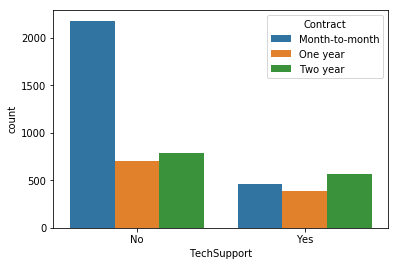

In [23]:
sns.countplot('TechSupport', hue = 'Contract', data = data1)

In [24]:
data1.loc[(data1['TechSupport'].isnull()) & (data1['Contract'] == 'Month-to-month'), 'TechSupport'] = 'No'

In [25]:
data1.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport         725
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

In [26]:
data1.loc[(data1['TechSupport'].isnull()) & (data1['MonthlyCharges'] <= 70), 'TechSupport'] = 'No'
data1.loc[(data1['TechSupport'].isnull()) & (data1['MonthlyCharges'] > 70), 'TechSupport'] = 'Yes'

In [27]:
data1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### The column total charges should be Float - type

In [28]:
data1['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

### Taking a visual look at the dataset

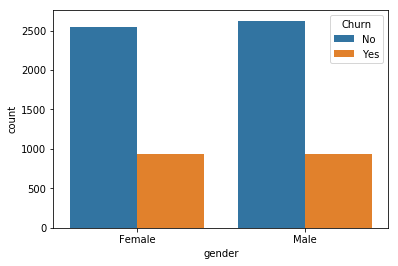

In [29]:
sns.countplot('gender',hue = 'Churn' ,data= data1)

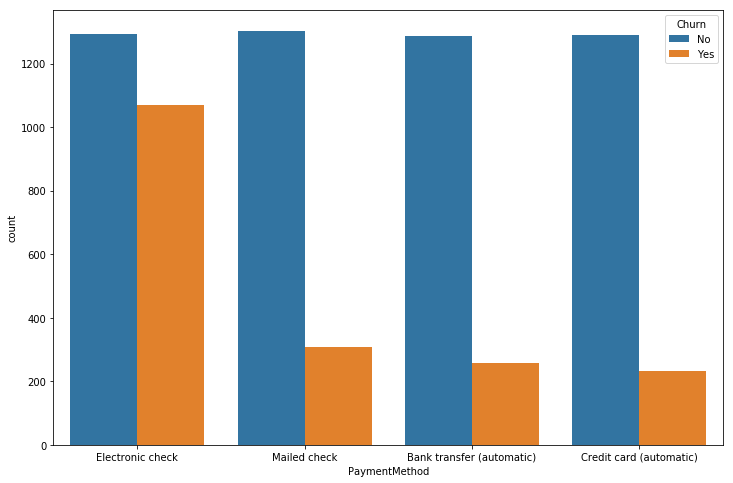

In [30]:
plt.figure(figsize=(12,8))
sns.countplot('PaymentMethod',hue='Churn', data = data1)

In [31]:
data1['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

### Variable 'TotalCharges' is a multiplication of two variables namely; 'tenure' and 'MonthlyCharges'. The graph below clearly shows this relationship. So we can drop 'TotalCharges'

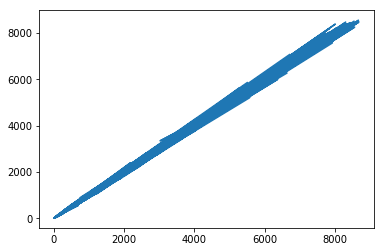

In [32]:
plt.plot(data1['TotalCharges'], data1['tenure']*data1['MonthlyCharges'])

In [33]:
X = data1.drop(['customerID', 'TotalCharges', 'Churn'], axis=1)
y = (data1['Churn'])

### Get dummy variables for categorical features

In [34]:
X = pd.get_dummies(columns=X.describe(include = 'O').columns, data=X, drop_first=True)

In [35]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1,0,0,1,0,0,0,...,1,1,0,0,1,0,0,0,0,0
4,0,2,70.70,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [36]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Male',
       'Partner_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [37]:
y = y.replace({'Yes':1,'No':0})

### Splitting the dataset into training and test sets

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5282, 22), (1761, 22), (5282,), (1761,))

### Scaling the continuous features in the training data.
Whenever we want distance measures to contribute equally across all features (kNN, SVM, regularized logistic regression), we use standard scaling since we get consistent mean-centering and unit scale differences as a comparison basis.

In [40]:
scaler = StandardScaler()
X_train[['tenure','MonthlyCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges']])
X_test[['tenure', 'MonthlyCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges']])

### Evaluation strategy to be used to compare models: ROC_AUC score
Reason: AUC is good for classification problems with a class imbalance. In this dataset, instances for churn are significantly lower than non-churn instances. Also, AUC scoring lets us evaluate models independently of the threshold.

### KNN Classification

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
tuned_parameters = [{'n_neighbors': [1,2,3,4,5,6,7,8]}]

knn = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=10, scoring='roc_auc')
knn.fit(X_train, y_train)
print(knn.best_params_)
print(knn.best_score_)

{'n_neighbors': 8}
0.8073263723579028


In [43]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
print("ROC-AUC for test data : {}".format(roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])))
KNN.append(roc_auc_score(y_test, knn.predict_proba(X_test)[:,1]))

ROC-AUC for test data : 0.7957085104854458


In [44]:
confusion_matrix(y_test, knn.predict(X_test))

array([[1134,  150],
       [ 256,  221]], dtype=int64)

In [45]:
print(classification_report(y_test, knn.predict(X_test)))

             precision    recall  f1-score   support

          0       0.82      0.88      0.85      1284
          1       0.60      0.46      0.52       477

avg / total       0.76      0.77      0.76      1761



### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty' : ['l1','l2']}
log_grid = GridSearchCV(LogisticRegression(random_state=0), param_grid, cv=10, scoring='roc_auc')
log_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [48]:
log_grid.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [49]:
log_grid.best_score_

0.8448374791956608

In [50]:
logreg = LogisticRegression(C = 0.1, penalty='l2', random_state=0)

In [51]:
logreg.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
print("ROC-AUC on test data: {}".format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])))

ROC-AUC on test data: 0.8300294872548444


In [53]:
LOGISTIC.append(roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))

In [54]:
confusion_matrix(y_test, logreg.predict(X_test))

array([[1145,  139],
       [ 220,  257]], dtype=int64)

In [55]:
print(classification_report(y_test, logreg.predict(X_test)))

             precision    recall  f1-score   support

          0       0.84      0.89      0.86      1284
          1       0.65      0.54      0.59       477

avg / total       0.79      0.80      0.79      1761



### Linear Support Vector Machine

In [56]:
from sklearn.svm import LinearSVC

In [57]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search_linsvm = GridSearchCV(LinearSVC(), param_grid, cv=10, scoring='roc_auc')

In [58]:
grid_search_linsvm.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [59]:
grid_search_linsvm.best_params_

{'C': 0.01}

In [60]:
grid_search_linsvm.best_score_

0.8433799385207984

In [61]:
lsvm = LinearSVC(C = 0.01, random_state=0)

In [62]:
lsvm.fit(X_train, y_train)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [63]:
print("ROC-AUC on test data: {}".format(roc_auc_score(y_test, lsvm.predict(X_test))))

ROC-AUC on test data: 0.7155043202257099


In [64]:
LINEARSVM.append((roc_auc_score(y_test, lsvm.predict(X_test))))

In [65]:
confusion_matrix(y_test, lsvm.predict(X_test))

array([[1151,  133],
       [ 222,  255]], dtype=int64)

In [66]:
print(classification_report(y_test, lsvm.predict(X_test)))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      1284
          1       0.66      0.53      0.59       477

avg / total       0.79      0.80      0.79      1761



### Kernalized Support Vector Machine - linear

In [67]:
from sklearn.svm import SVC

In [68]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_Kernel_lin = GridSearchCV(SVC(kernel = 'linear', random_state=0), param_grid, cv=5, scoring = 'roc_auc')

In [69]:
grid_search_Kernel_lin.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [70]:
grid_search_Kernel_lin.best_params_

{'C': 0.01, 'gamma': 0.001}

In [71]:
kernelsvmlin = SVC(C = 0.1, gamma = 0.001,kernel = 'linear',random_state=0, probability=True)

In [72]:
kernelsvmlin.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)

In [73]:
print("ROC-AUC on test data: {}".format(roc_auc_score(y_test, kernelsvmlin.predict_proba(X_test)[:,1])))

ROC-AUC on test data: 0.8248798304564484


In [74]:
KERNELSVMLIN.append((roc_auc_score(y_test, kernelsvmlin.predict(X_test))))

In [75]:
confusion_matrix(y_test, kernelsvmlin.predict(X_test))

array([[1142,  142],
       [ 222,  255]], dtype=int64)

In [76]:
print(classification_report(y_test, kernelsvmlin.predict(X_test)))

             precision    recall  f1-score   support

          0       0.84      0.89      0.86      1284
          1       0.64      0.53      0.58       477

avg / total       0.78      0.79      0.79      1761



### Kernelized SVC - rbf

In [77]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_Kernel = GridSearchCV(SVC(kernel = 'rbf', random_state=0), param_grid, cv=5, scoring = 'roc_auc')

In [78]:
grid_search_Kernel.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [79]:
grid_search_Kernel.best_params_

{'C': 100, 'gamma': 0.001}

In [80]:
kernelsvm = SVC(C = 100, gamma = 0.001,kernel = 'rbf',random_state=0, probability=True)

In [81]:
kernelsvm.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)

In [82]:
print("ROC-AUC on test data: {}".format(roc_auc_score(y_test, kernelsvm.predict_proba(X_test)[:,1])))

ROC-AUC on test data: 0.8251557632398754


In [83]:
KERNELSVM.append((roc_auc_score(y_test, kernelsvm.predict(X_test))))

In [84]:
confusion_matrix(y_test, kernelsvm.predict(X_test))

array([[1158,  126],
       [ 232,  245]], dtype=int64)

In [85]:
print(classification_report(y_test, kernelsvm.predict(X_test)))

             precision    recall  f1-score   support

          0       0.83      0.90      0.87      1284
          1       0.66      0.51      0.58       477

avg / total       0.79      0.80      0.79      1761



### Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
tuned_parameters = [{'max_depth': [3,4,5,6,7,8,10,12], 'min_samples_leaf' : [i for i in range(50,150,10)]}]

In [88]:
dectree = GridSearchCV(DecisionTreeClassifier(random_state=0), tuned_parameters, cv=10, scoring="roc_auc")
dectree.fit(X_train, y_train)
print(dectree.best_params_)
print(dectree.best_score_)

{'max_depth': 6, 'min_samples_leaf': 70}
0.8314900508000527


In [89]:
tree_best = DecisionTreeClassifier(max_depth=6, min_samples_leaf=70, random_state=0)

In [90]:
tree_best.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=70, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [91]:
print("ROC-AUC on test data: {}".format(roc_auc_score(y_test, tree_best.predict_proba(X_test)[:,1])))
DECISIONTREE.append(roc_auc_score(y_test, tree_best.predict_proba(X_test)[:,1]))

ROC-AUC on test data: 0.8182451981164731


In [92]:
imp = pd.DataFrame(tree_best.feature_importances_, index = list(X), columns = ['Importance'])

In [93]:
imp

,Importance
SeniorCitizen,0.000000
tenure,0.486222
MonthlyCharges,0.021196
gender_Male,0.000430
Partner_Yes,0.000000
PhoneService_Yes,0.000000
MultipleLines_No phone service,0.000000
MultipleLines_Yes,0.024459
InternetService_Fiber optic,0.321258
InternetService_No,0.048506


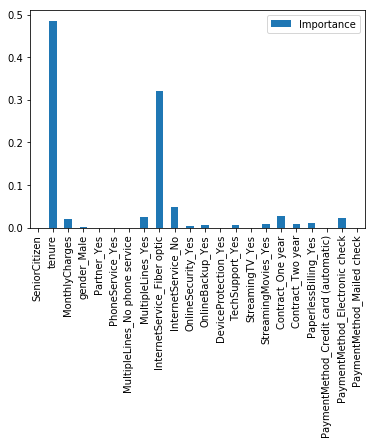

In [94]:
imp.plot(kind = 'bar')

### Comparison of AUC scores across all models

In [95]:
a= [KNN, LOGISTIC, LINEARSVM, KERNELSVMLIN, KERNELSVM, DECISIONTREE]

In [96]:
comparison = pd.DataFrame(a)

In [97]:
comparison

,0
0,0.795709
1,0.830029
2,0.715504
3,0.712000
4,0.707748
5,0.818245


In [98]:
comparison.index = ['knn','logistic','linearsvm','kernelsvm-lin','kernelsvm-rbf','decisiontree']

In [99]:
comparison

,0
knn,0.795709
logistic,0.830029
linearsvm,0.715504
kernelsvm-lin,0.712000
kernelsvm-rbf,0.707748
decisiontree,0.818245


Text(0,0.5,'ROC_AUC_SCORE')

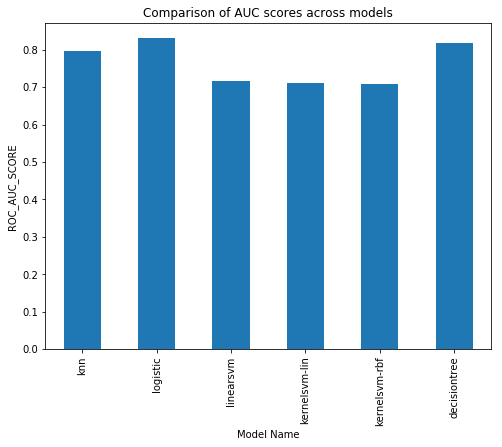

In [100]:
ax = comparison.plot(kind='bar', legend=False,figsize=(8,6), title='Comparison of AUC scores across models')
ax.set_xlabel("Model Name")
ax.set_ylabel("ROC_AUC_SCORE")

### From looking at the above model, we can see that Logistic Regression gives the best results, followed by the Decision Tree model.